In [1]:
#导入相关库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10,5))
plt.rc('font',size=12)
pd.options.display.max_rows = 10
from datetime import datetime
%matplotlib inline

In [2]:

#加载数据集
columns = ['id','date','num','amount']
df = pd.read_csv('CDNOW.txt',names=columns,sep='\s+')
df.head()

,id,date,num,amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [3]:
# 商品销售静态分析

In [4]:
#查看数据导入效果
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
id        69659 non-null int64
date      69659 non-null int64
num       69659 non-null int64
amount    69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [5]:
#商品销售动态分析

#-----数据不存在缺省值,数据很干净。

In [6]:
#查看描述性统计
df.describe()

,id,date,num,amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [7]:
#购买数量分析：用户平均购买2.4个商品，标准差为2.33个商品，中位数为2个商品，单个用户购买商品的最大值为99个商品。表明大部分订单购买数量不多。
#购买金额分析：用户平均购买金额为35.89元，标准差为36.28元，中位数为25.98元，单个用户购买商品的最大金额是1286.01元。表明大部分订单都集中在小额,且数据波动性较大。

In [8]:
#数据清洗

In [9]:
#时间列转换
df['date']=pd.to_datetime(df.date,format='%Y%m%d')

In [10]:
df.head()

,id,date,num,amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


In [11]:

df['month'] = df['date'].values.astype('datetime64[M]')
df.head()

,id,date,num,amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


In [12]:
# 商品销售动态分析

Text(0.5,0,'Month')

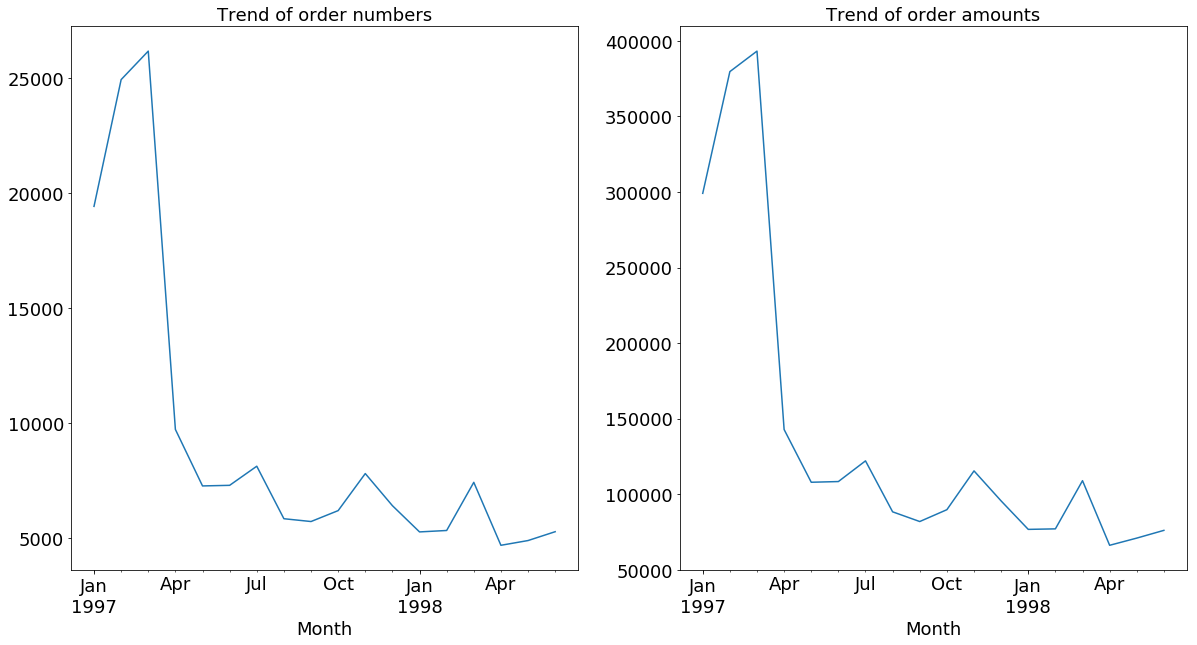

In [13]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(1,2,1)
df[['month','num']].groupby(df.month).num.sum().plot(fontsize=18)
plt.title('Trend of order numbers',fontsize=18)
ax2=fig.add_subplot(1,2,2)
df[['month','amount']].groupby(df.month).amount.sum().plot(fontsize=18)
plt.title('Trend of order amounts',fontsize=18)
ax1.set_xlabel('Month',fontsize=18)
ax2.set_xlabel('Month',fontsize=18)

In [14]:
#订单数量趋势和订单金额趋势基本一致，可以看出来，1997年前3个月的销量特别高，随之而来的销售额也是暴涨，在3月份之后骤然下降，接近平稳。

In [15]:
#用户个体消费行为的静态分析
#用户累积购买数量和累积购买金额分析

In [16]:
user = df.groupby('id').sum()
user.head()

,num,amount
id,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61


In [17]:
#查看描述性统计
user.describe()

,num,amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


In [18]:
# 从用户角度看，每位用户平均购买7张CD，最多的用户购买了1033张。用户的平均消费金额（客单价）106元，标准差是240，结合分位数和最大值看，平均值才和75分位接近，肯定存在小部分的高额消费用户。

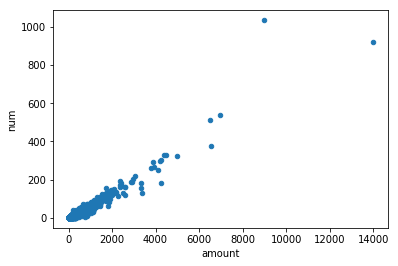

In [19]:
user.plot.scatter(x='amount',y='num')


In [20]:
# 绘制用户的散点图，用户比较健康而且规律性很强。因为这是CD网站的销售数据，商品比较单一，金额和商品量的关系也因此呈线性，没几个离群点。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5A7ED2CF8>,
      dtype=object)

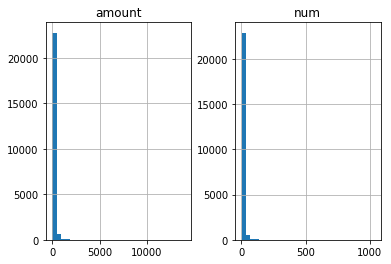

In [21]:
user.hist(bins=30)


In [24]:
#高消费用户在直方图中几乎看不到，所以试排除极大值再看看分布情况

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5A7F40198>,
      dtype=object)

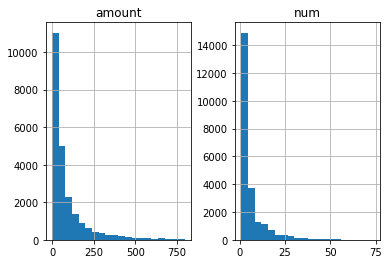

In [25]:
user.query('amount<800').hist(bins=20)

In [26]:
#筛选出了消费金额小于800的用户，我们可以看到：

#大部分用户的消费能力并不高，将近半数的用户消费金额不超过40元，高消费用户（ >200元 ）不超过2000人。
#从上图直方图可知，大部分用户的消费能力确实不高，绝大部分呈现集中在很低的消费档次。高消费用户在图上几乎看不到，这也确实符合消费行为的行业规律。
#虽然有极端数据干扰，但是大部分的用户还是集中在比较低的消费档次。

In [27]:
#用户购买数量累积贡献和购买金额累积贡献分析
#计算累积贡献——先排序，再累积

In [28]:
user_amount = user.sort_values(by = 'amount').reset_index()
user_amount['amount_cumsum']=user_amount.amount.cumsum()
user_amount.tail()

,id,num,amount,amount_cumsum
23565,7931,514,6497.18,2463822.60
23566,19339,378,6552.70,2470375.30
23567,7983,536,6973.07,2477348.37
23568,14048,1033,8976.33,2486324.70
23569,7592,917,13990.93,2500315.63


In [29]:
amount_total = user_amount.amount_cumsum.max()
user_amount['amount_prop'] = user_amount.amount_cumsum.apply(lambda x: x/amount_total)
user_amount.tail()

,id,num,amount,amount_cumsum,amount_prop
23565,7931,514,6497.18,2463822.60,0.985405
23566,19339,378,6552.70,2470375.30,0.988025
23567,7983,536,6973.07,2477348.37,0.990814
23568,14048,1033,8976.33,2486324.70,0.994404
23569,7592,917,13990.93,2500315.63,1.000000


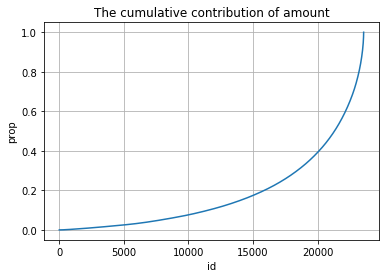

In [30]:
user_amount.amount_prop.plot()
plt.grid()
plt.xlabel('id')
plt.ylabel('prop')
plt.title('The cumulative contribution of amount')
plt.show()

In [31]:
# 前20000个用户，大约80%的用户贡献了40%的销售金额，20%的用户贡献了60%的销售金额。

In [32]:
user_num = user.sort_values(by = 'num').reset_index()
user_num['num_cumsum']=user_num.num.cumsum()
user_num.tail()

,id,num,amount,num_cumsum
23565,19339,378,6552.70,164881
23566,7931,514,6497.18,165395
23567,7983,536,6973.07,165931
23568,7592,917,13990.93,166848
23569,14048,1033,8976.33,167881


In [33]:

num_total = user_num.num_cumsum.max()
user_num['num_prop'] = user_num.num_cumsum.apply(lambda x: x/num_total)
user_num.tail()

,id,num,amount,num_cumsum,num_prop
23565,19339,378,6552.70,164881,0.982130
23566,7931,514,6497.18,165395,0.985192
23567,7983,536,6973.07,165931,0.988385
23568,7592,917,13990.93,166848,0.993847
23569,14048,1033,8976.33,167881,1.000000


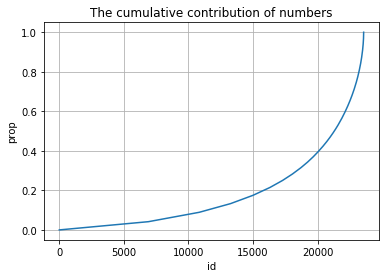

In [34]:
user_num.num_prop.plot()
plt.grid()
plt.xlabel('id')
plt.ylabel('prop')
plt.title('The cumulative contribution of numbers')
plt.show()

In [35]:
# 前20000名用户贡献了40%的销售数量，而后3500名用户贡献了60%的销售数量。

In [36]:
#用户最大单笔购买数量和单笔消费金额分析

In [37]:
user_max=df.groupby('id').max()
user_max.head()

,date,num,amount,month
id,,,,
1,1997-01-01,1,11.77,1997-01-01
2,1997-01-12,5,77.00,1997-01-01
3,1998-05-28,5,57.45,1998-05-01
4,1997-12-12,2,29.73,1997-12-01
5,1998-01-03,4,46.46,1998-01-01


In [38]:
user_max.describe()


,num,amount
count,23570.000000,23570.000000
mean,2.854391,43.897931
std,2.944292,46.153873
min,1.000000,0.000000
25%,1.000000,15.360000
50%,2.000000,29.980000
75%,3.000000,54.677500
max,99.000000,1286.010000


In [39]:
# 用户最大单笔购买数量的均值为2.85件，中位数为2件，最大值为99件；用户最大单笔消费金额的均值为43.90元，中位数为29.98元，最大值为1286元；可见大部分用户单笔购买量和消费金额都不大。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5A8444AC8>,
      dtype=object)

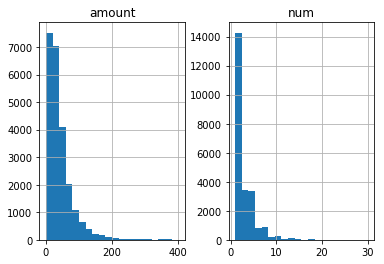

In [40]:
user_max.query('amount<400').hist(bins=20)


In [41]:

筛选出了最大单笔消费金额小于400的用户，我们可以看到：

大部分用户的消费能力并不高，将超过半数的用户单笔消费金额不超过100元，高消费用户（ >200元 ）很少。
从上图直方图可知，大部分用户的消费能力确实不高，绝大部分呈现集中在很低的消费档次。高消费用户在图上几乎看不到，这也确实符合消费行为的行业规律。
虽然有极端数据干扰，但是大部分的用户还是集中在比较低的消费档次。

SyntaxError: invalid character in identifier (<ipython-input-41-c19227765357>, line 2)

In [42]:
#用户购买次数分析

In [43]:
user_count=df[['id','num']].groupby('id',as_index=True).count()
user_count.columns=['count']
user_count.head()

,count
id,
1,1
2,2
3,6
4,4
5,11


In [44]:
user_count.describe()


,count
count,23570.000000
mean,2.955409
std,4.736558
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,217.000000


In [46]:
#用户购买次数的均值为2.95次，中位数为1次，次数最大值为217次，可见大部分用户购买次数都低于3次，有个别极端的情况。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5A84D5908>]],
      dtype=object)

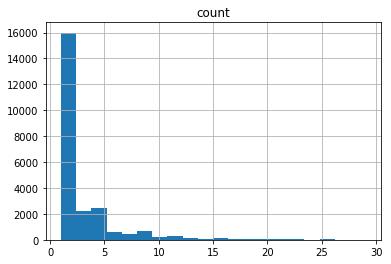

In [47]:
user_count.query('count<30').hist(bins=20)

In [48]:
筛选出了购买次数小于50的用户，我们可以看到：

大部分用户的消费次数并不高，将超过半数的用户单笔消费金额不超过3次，高密度消费的用户很少。
从上图直方图可知，大部分用户的消费热情确实不高，绝大部分呈现集中在很低的消费次数。高密度消费用户在图上几乎看不到，这也确实符合消费行为的行业规律。
虽然有极端数据干扰，但是大部分的用户还是集中消费次数较低的层次。

SyntaxError: invalid character in identifier (<ipython-input-48-a7e3ec2721c4>, line 1)

In [49]:
#用户消费行为动态分析
#用户第一次购买时间分析

In [50]:
date_min = df.groupby('id').date.min()
date_min

id
1       1997-01-01
2       1997-01-12
3       1997-01-02
4       1997-01-01
5       1997-01-01
           ...    
23566   1997-03-25
23567   1997-03-25
23568   1997-03-25
23569   1997-03-25
23570   1997-03-25
Name: date, Length: 23570, dtype: datetime64[ns]

In [51]:
#用户最后一次购买时间分析

In [52]:
date_max = df.groupby('id').date.max()
date_max

id
1       1997-01-01
2       1997-01-12
3       1998-05-28
4       1997-12-12
5       1998-01-03
           ...    
23566   1997-03-25
23567   1997-03-25
23568   1997-04-22
23569   1997-03-25
23570   1997-03-26
Name: date, Length: 23570, dtype: datetime64[ns]

In [53]:
#用户最近一次消费与当前时间间隔


In [54]:
date_diff = df.date.max()-date_max
date_diff

id
1       545 days
2       534 days
3        33 days
4       200 days
5       178 days
          ...   
23566   462 days
23567   462 days
23568   434 days
23569   462 days
23570   461 days
Name: date, Length: 23570, dtype: timedelta64[ns]

In [55]:
date_diff.mean()


Timedelta('367 days 05:19:09.495120')

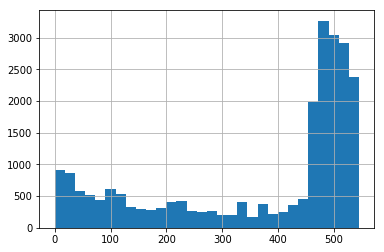

In [56]:
(date_diff/np.timedelta64(1,'D')).hist(bins=30)


In [57]:
大部分用户最近一次消费的时间离当前时间已经超过了450天，证明流失用户比较多。另外，仍有数目可观的一部分用户最近一次消费的时间离当前时间小于100天，应该尽快对用户进行引导，促进其消费，防止用户流失。

SyntaxError: invalid character in identifier (<ipython-input-57-b1b44affdfa9>, line 1)

In [58]:
#用户生命周期分析


In [59]:
(date_max-date_min).head()


id
1     0 days
2     0 days
3   511 days
4   345 days
5   367 days
Name: date, dtype: timedelta64[ns]

In [60]:
(date_max-date_min).mean()


Timedelta('134 days 20:55:36.987696')

In [61]:
用户的平均生命周期为134天，情况还不错，还需要看生命周期的分布。


SyntaxError: invalid character in identifier (<ipython-input-61-1ae1ec820533>, line 1)

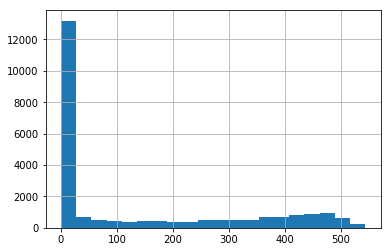

In [62]:
((date_max-date_min)/np.timedelta64(1,'D')).hist(bins=20)


In [63]:
大部分用户只消费了一次，所以大部分的生命周期都集中在了0天。不妨将只消费了一次的用户排除，计算消费2次以上的用户的生命周期。


SyntaxError: invalid character in identifier (<ipython-input-63-9185cff98862>, line 1)

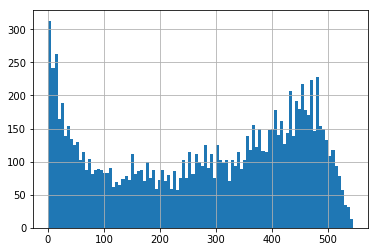

In [64]:
life_time=(date_max-date_min)/np.timedelta64(1,'D')
life_time[life_time>0].hist(bins=100)

In [65]:
上图可见，用户生命周期呈现双峰趋势，20天内生命周期的用户是一个高峰，400至500天内生命周期的用户是另一个高峰。
根据此情况，应该在20天内对客户进行引导，促进其再次消费并形成消费习惯，延长其生命周期；在100至400天的用户，也要根据其特点推出有针对性的营销活动，引导其持续消费。

SyntaxError: invalid character in identifier (<ipython-input-65-f46b6424d65e>, line 1)

In [66]:
life_time[life_time>0].mean()


276.0448072247308

In [67]:
分析去掉0天生命周期的用户之后的用户生命周期平均值可发现，若在用户首次消费后，加强对其再次消费的引导，可将其生命周期延长到原来的两倍。


SyntaxError: invalid character in identifier (<ipython-input-67-7d883affecd2>, line 1)

In [68]:
#首次回购周期


In [69]:
first_back = pd.merge(left = df , right = date_min.reset_index(),how='inner',on='id',suffixes= ('','_min'))
first_back

,id,date,num,amount,month,date_min
0,1,1997-01-01,1,11.77,1997-01-01,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01,1997-01-12
2,2,1997-01-12,5,77.00,1997-01-01,1997-01-12
3,3,1997-01-02,2,20.76,1997-01-01,1997-01-02
4,3,1997-03-30,2,20.76,1997-03-01,1997-01-02
...,...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01,1997-03-25
69655,23568,1997-04-22,1,14.99,1997-04-01,1997-03-25
69656,23569,1997-03-25,2,25.74,1997-03-01,1997-03-25
69657,23570,1997-03-25,3,51.12,1997-03-01,1997-03-25


In [70]:
first_back['date_diff']=(first_back.date-first_back['date_min'])/np.timedelta64(1,'D')
first_back

,id,date,num,amount,month,date_min,date_diff
0,1,1997-01-01,1,11.77,1997-01-01,1997-01-01,0.0
1,2,1997-01-12,1,12.00,1997-01-01,1997-01-12,0.0
2,2,1997-01-12,5,77.00,1997-01-01,1997-01-12,0.0
3,3,1997-01-02,2,20.76,1997-01-01,1997-01-02,0.0
4,3,1997-03-30,2,20.76,1997-03-01,1997-01-02,87.0
...,...,...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01,1997-03-25,11.0
69655,23568,1997-04-22,1,14.99,1997-04-01,1997-03-25,28.0
69656,23569,1997-03-25,2,25.74,1997-03-01,1997-03-25,0.0
69657,23570,1997-03-25,3,51.12,1997-03-01,1997-03-25,0.0


In [71]:
first_back_diff = first_back.query('date_diff>0').groupby('id').date_diff.min()
first_back_diff.describe()

count    11516.000000
mean       110.995832
std        122.144701
min          1.000000
25%         18.000000
50%         57.000000
75%        171.000000
max        533.000000
Name: date_diff, dtype: float64

In [72]:
用户首次回购周期的平均值是111天，中位数是57天，最大值是533天。


SyntaxError: invalid character in identifier (<ipython-input-72-269f90319f88>, line 1)

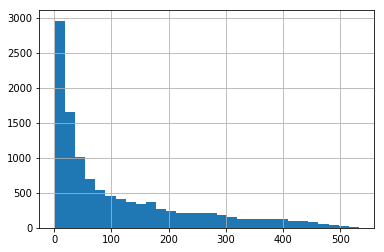

In [73]:
first_back_diff.hist(bins=30)


In [74]:
典型的（指数）长尾分布，大部分用户的首次回购周期确实比较短。


SyntaxError: invalid character in identifier (<ipython-input-74-3f569cb45348>, line 1)

In [75]:
#平均购买周期


In [76]:
order_diff=df.groupby('id').apply(lambda x:x.date-x.date.shift())


In [77]:
order_diff.head()


id   
1   0       NaT
2   1       NaT
    2    0 days
3   3       NaT
    4   87 days
Name: date, dtype: timedelta64[ns]

In [78]:
order_diff.describe()


count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: date, dtype: object

In [79]:
平均每个用户的购买时间间隔是68天，间隔最长的是533天。想要召回用户，在60天左右的消费间隔是比较好的。
绝大部分用户的消费周期都低于100天。

SyntaxError: invalid character in identifier (<ipython-input-79-80b158535a97>, line 1)

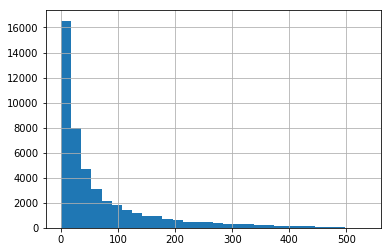

In [80]:
(order_diff/np.timedelta64(1,'D')).dropna().hist(bins=30)


In [81]:
典型的（指数）长尾分布，大部分用户的消费间隔确实比较短。不妨将时间召回点设为消费后立即赠送优惠券，消费后10天询问用户礼品怎么样，消费后20天提醒优惠券到期，消费后30天短信推送。

SyntaxError: invalid character in identifier (<ipython-input-81-9d9bde356018>, line 1)

In [82]:
#各月复购率

In [83]:
#复购率的定义：在某时间窗口内消费两次及以上的用户在总消费用户中占比。这里的时间窗口是月，如果一个用户在同一天下了两笔订单，这里也将他算作复购用户。

In [84]:
#每个用户在每月的购买次数的透视图
pivoted_df = df.pivot_table(index='id',columns='month',values='date',aggfunc='count').fillna(0)
pivoted_df.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [85]:
#转换：消费2次以上记为1，消费1次记为0，消费0次记为NAN
#applymap针对dataframe所有数据
pivoted_df_trans=pivoted_df.applymap(lambda x: 1 if x>1 else np.nan if x==0 else 0)
pivoted_df_trans.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [86]:
#count统计所有非空数据个数表示总消费用户数，sum计算非0数据的和表示消费两次以上的用户数
df_duplicate =pd.DataFrame(pivoted_df_trans.sum()/pivoted_df_trans.count()).reset_index()
df_duplicate.columns = ['month','duplicate_rate']
df_duplicate['month'] = df_duplicate.month.astype(str).apply(lambda x:x[:-3])
df_duplicate.head()

,month,duplicate_rate
0,1997-01,0.107571
1,1997-02,0.122288
2,1997-03,0.155292
3,1997-04,0.223600
4,1997-05,0.196929


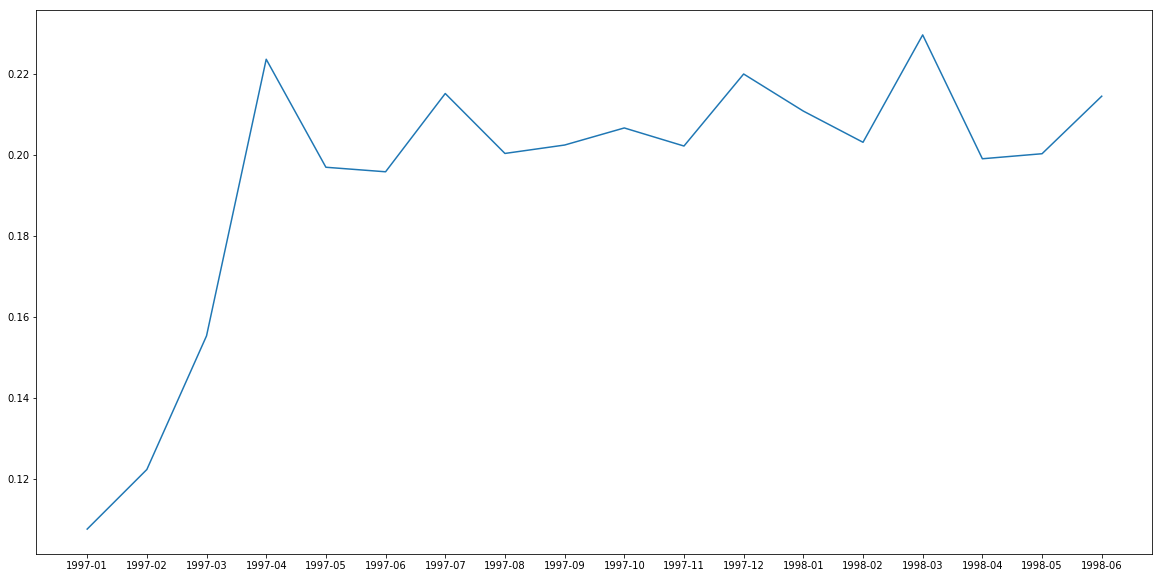

In [87]:
plt.figure(figsize = (20,10))
plt.plot(df_duplicate.month,df_duplicate.duplicate_rate)

In [88]:
说明：图上可以看出复购率在早期，因为大量新用户加入的关系，新客的复购率并不高，如1月新客们的复购率只有6%左右。而在后期，这时的用户都是大浪淘沙剩下的老客，复购率比较稳定，在20%左右。单看新客和老客，复购率有三倍左右的差距。

SyntaxError: invalid character in identifier (<ipython-input-88-b1ecb3130c58>, line 1)

In [89]:
#各月回购率
# 回购率：是某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。比如，我1月消费用户1000，他们中有300个2月依然消费，回购率是30%。

In [90]:
pivoted_purchase=pivoted_df.applymap(lambda x: 1 if x>0 else np.nan)
pivoted_purchase.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
id,,,,,,,,,,,,,,,,,,
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [91]:
len(pivoted_purchase.columns)


18

In [92]:
#如果本月进行消费，下月也进行消费，则记为1；如果下月没有消费，则记为0，若本月没有记为消费，则记为nan
pivoted_purchase_return = pivoted_purchase*(pivoted_purchase.shift(-1,axis=1)==1)

In [93]:
#count统计所有非空数据个数表示总消费用户数，sum计算非0数据的和表示消费两次以上的用户数
df_purchase =pd.DataFrame(pivoted_purchase_return.sum()/pivoted_purchase_return.count()).reset_index()
df_purchase.columns = ['month','purchase_rate']
df_purchase['month'] = df_purchase.month.astype(str).apply(lambda x:x[:-3])
df_purchase.head()

,month,purchase_rate
0,1997-01,0.147464
1,1997-02,0.174504
2,1997-03,0.186161
3,1997-04,0.301914
4,1997-05,0.337398


In [94]:
df_purchase=df_purchase.iloc[:-1,:]


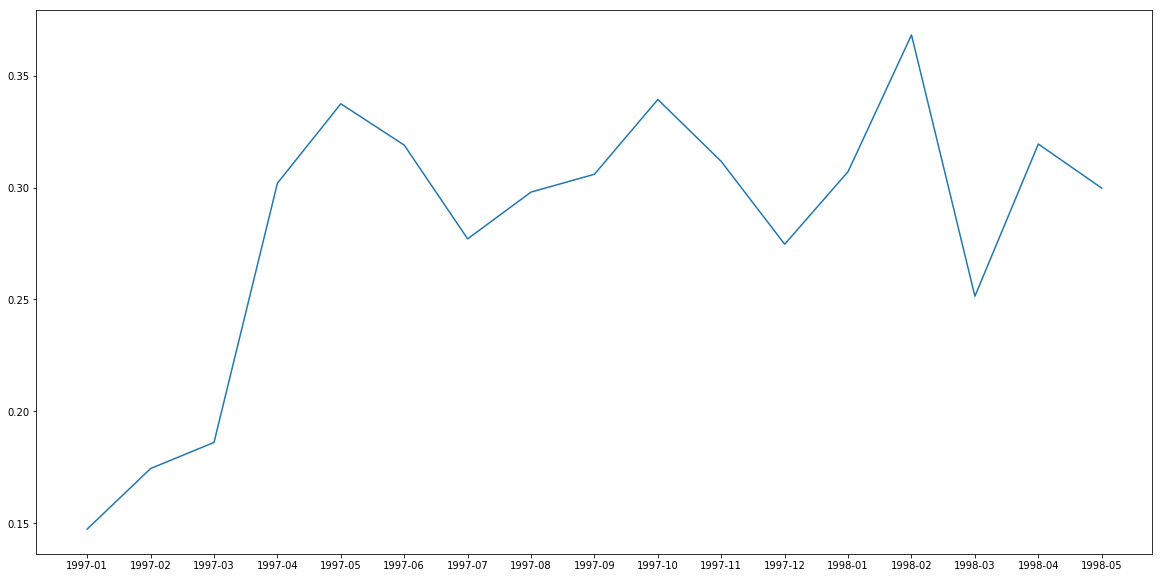

In [95]:
plt.figure(figsize = (20,10))
plt.plot(df_purchase.month,df_purchase.purchase_rate)

In [96]:

上图可以看出，在初期用户的回购率并不高，1月的回购率只有15%左右，4月份起回购率稳定在30%左右。
从每月有回购消费的用户数数据可以看出，回购用户数整体有下降趋势。
对回购率的分析，再次说明了对于新用户，在其第一次消费后的三个月内是一段重要的时期，需要营销策略积极引导其再次消费及持续消费。
另外，对于有持续消费的老客，也要适时推出反馈老客户的优惠活动，以加强老客的忠诚度。

SyntaxError: invalid character in identifier (<ipython-input-96-a089c22b7a31>, line 2)

In [97]:
#用户留存率
#留存率：它指用户在第一次消费后，有多少比率进行第二次消费。

In [98]:
first_back.head()


,id,date,num,amount,month,date_min,date_diff
0,1,1997-01-01,1,11.77,1997-01-01,1997-01-01,0.0
1,2,1997-01-12,1,12.00,1997-01-01,1997-01-12,0.0
2,2,1997-01-12,5,77.00,1997-01-01,1997-01-12,0.0
3,3,1997-01-02,2,20.76,1997-01-01,1997-01-02,0.0
4,3,1997-03-30,2,20.76,1997-03-01,1997-01-02,87.0


In [99]:
#将时间差值分桶处理
bin=[0,3,7,15,30,60,90,180,365]
user_purchase_retention = first_back.copy()
user_purchase_retention['date_diff_bin']=pd.cut(user_purchase_retention.date_diff,bins=bin)
user_purchase_retention.head(10)

,id,date,num,amount,month,date_min,date_diff,date_diff_bin
0,1,1997-01-01,1,11.77,1997-01-01,1997-01-01,0.0,NaN
1,2,1997-01-12,1,12.00,1997-01-01,1997-01-12,0.0,NaN
2,2,1997-01-12,5,77.00,1997-01-01,1997-01-12,0.0,NaN
3,3,1997-01-02,2,20.76,1997-01-01,1997-01-02,0.0,NaN
4,3,1997-03-30,2,20.76,1997-03-01,1997-01-02,87.0,"(60, 90]"
5,3,1997-04-02,2,19.54,1997-04-01,1997-01-02,90.0,"(60, 90]"
6,3,1997-11-15,5,57.45,1997-11-01,1997-01-02,317.0,"(180, 365]"
7,3,1997-11-25,4,20.96,1997-11-01,1997-01-02,327.0,"(180, 365]"
8,3,1998-05-28,1,16.99,1998-05-01,1997-01-02,511.0,NaN
9,4,1997-01-01,2,29.33,1997-01-01,1997-01-01,0.0,NaN


In [100]:
#用户第一次消费之后，后续各时间段的消费总额
pivoted_retention=user_purchase_retention.pivot_table(index='id',columns='date_diff_bin',values='amount',aggfunc=sum,dropna=False)
pivoted_retention.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
id,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,40.3,NaN,78.41
4,NaN,NaN,NaN,29.73,NaN,NaN,NaN,41.44
5,NaN,NaN,13.97,NaN,38.9,NaN,110.4,155.54


In [101]:
pivoted_retention.mean()#各时间段的平均消费额


date_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

In [102]:
虽然后面时间段的金额高，但是它的时间范围也宽广。从平均效果看，用户第一次消费后的0～3天内，更可能消费更多。


SyntaxError: invalid character in identifier (<ipython-input-102-6e4f5d5b5e09>, line 1)

In [103]:
#1代表有消费，0代表没有
pivoted_retention_trans=pivoted_retention.applymap(lambda x:1 if x>0 else 0)
pivoted_retention_trans

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
id,,,,,,,,
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1
4,0,0,0,1,0,0,0,1
5,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...
23566,0,0,0,0,0,0,0,0
23567,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0


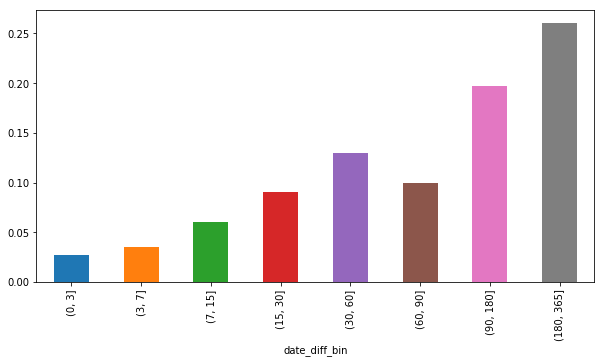

In [104]:
#每笔订单离第一笔订单的时间间隔
(pivoted_retention_trans.sum()/pivoted_retention_trans.count()).plot.bar(figsize=(10,5))

In [105]:
只有2.5%的用户在第一次消费的次日至3天内有过消费，3%的用户在3～7天内有过消费。数字并不好看，CD购买确实不是高频消费行为。有20%的用户在第一次消费后的三个月到半年之间有过购买，27%的用户在半年后至1年内有过购买。
从运营角度看，CD机营销在服务新用户的同时，应该注重用户忠诚度的培养，放长线掉大鱼，在一定时间内召回用户购买。

SyntaxError: invalid syntax (<ipython-input-105-93eb281db0fc>, line 1)

In [106]:
#用户分层（活跃用户和回流用户比率）
##按用户活跃程度分层---新用户、活跃用户、不活跃用户、回流用户

##新用户的定义是第一次消费。
##活跃用户即老客，在某一个时间窗口内有过消费。
##不活跃用户则是时间窗口内没有消费过的老客。
##回流用户是在上一个窗口中没有消费，而在当前时间窗口内有过消费。

In [107]:
pivoted_df.head()


month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [108]:
pivoted_df1=pivoted_df.applymap(lambda x:1 if x>0 else 0)
pivoted_df1.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [109]:
def active_status(data):
    status=[]
    for i in range(18): #共18个月
        
        #若本月没有消费
        if data[i]==0:
            if len(status)>0:#判断是否第一个月
                if status[i-1]=='unreg':#前一个月不是首次消费，不是新客
                    status.append('unreg')#则本月也不是新客
                else:
                    status.append('unactive')#前面曾经消费过(!=unreg)，属于老客，但是本月无消费，则本月为不活跃用户
            else:
                status.append('unreg')#是第一个月且本月无消费
         #若本月消费
        else:
            if len(status)==0:#判断是否第一个月
                status.append('new')#则为新客
            else:#不是第一个月
                if status[i-1] =='unactive':#前一个月没有消费，是不活跃用户
                    status.append('return')#本月为回流用户
                elif status[i-1]=='unreg':
                    status.append('new')#前面的月份没有消费，本月第一次消费，为新客
                else:#前一个月是active或者new，都是在前一个月消费了，所以是老客继续消费，为active
                    status.append('active')#本月为活跃用户
                    
    return status

In [110]:
#可得到一张不同用户在不同月份的不同状态（new=新、active=活跃、return=回流、unactive=流失）,unreg相当于未注册，指这个用户在这个月及以前从未购买过产品，主要为了统计起来更加方便而加进去。
indexs=df['month'].sort_values().astype('str').unique()
pivoted_df2=pivoted_df1.apply(lambda x:pd.Series(active_status(x),index=indexs),axis=1)
pivoted_df2.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [111]:
pivoted_df2

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,unreg,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [112]:
#在透视图中数某个内容的个数
pivoted_df3=pivoted_df2.replace('unreg',np.nan).apply(lambda x:pd.value_counts(x)).fillna(0).T
pivoted_df3

,active,new,return,unactive
1997-01-01,0.0,7846.0,0.0,0.0
1997-02-01,1157.0,8476.0,0.0,6689.0
1997-03-01,1681.0,7248.0,595.0,14046.0
1997-04-01,1773.0,0.0,1049.0,20748.0
1997-05-01,852.0,0.0,1362.0,21356.0
...,...,...,...,...
1998-02-01,472.0,0.0,1079.0,22019.0
1998-03-01,571.0,0.0,1489.0,21510.0
1998-04-01,518.0,0.0,919.0,22133.0
1998-05-01,459.0,0.0,1029.0,22082.0


In [113]:
#计算活跃用户和回流用户的比例
pivoted_df3['sum_id']=pivoted_df3.sum(axis=1)
pivoted_df3['active_prop']=pivoted_df3.active/pivoted_df3.sum_id
pivoted_df3['return_prop']=pivoted_df3['return']/pivoted_df3.sum_id

In [114]:
pivoted_df3=pivoted_df3.reset_index()
labels=np.array(pivoted_df3.columns)
labels[0]='month'
pivoted_df3.columns=labels
pivoted_df3['month'] = pivoted_df3.month.astype(str).apply(lambda x:x[:-3])
pivoted_df3

,month,active,new,return,unactive,sum_id,active_prop,return_prop
0,1997-01,0.0,7846.0,0.0,0.0,7846.0,0.000000,0.000000
1,1997-02,1157.0,8476.0,0.0,6689.0,16322.0,0.070886,0.000000
2,1997-03,1681.0,7248.0,595.0,14046.0,23570.0,0.071319,0.025244
3,1997-04,1773.0,0.0,1049.0,20748.0,23570.0,0.075223,0.044506
4,1997-05,852.0,0.0,1362.0,21356.0,23570.0,0.036148,0.057785
...,...,...,...,...,...,...,...,...
13,1998-02,472.0,0.0,1079.0,22019.0,23570.0,0.020025,0.045779
14,1998-03,571.0,0.0,1489.0,21510.0,23570.0,0.024226,0.063174
15,1998-04,518.0,0.0,919.0,22133.0,23570.0,0.021977,0.038990
16,1998-05,459.0,0.0,1029.0,22082.0,23570.0,0.019474,0.043657


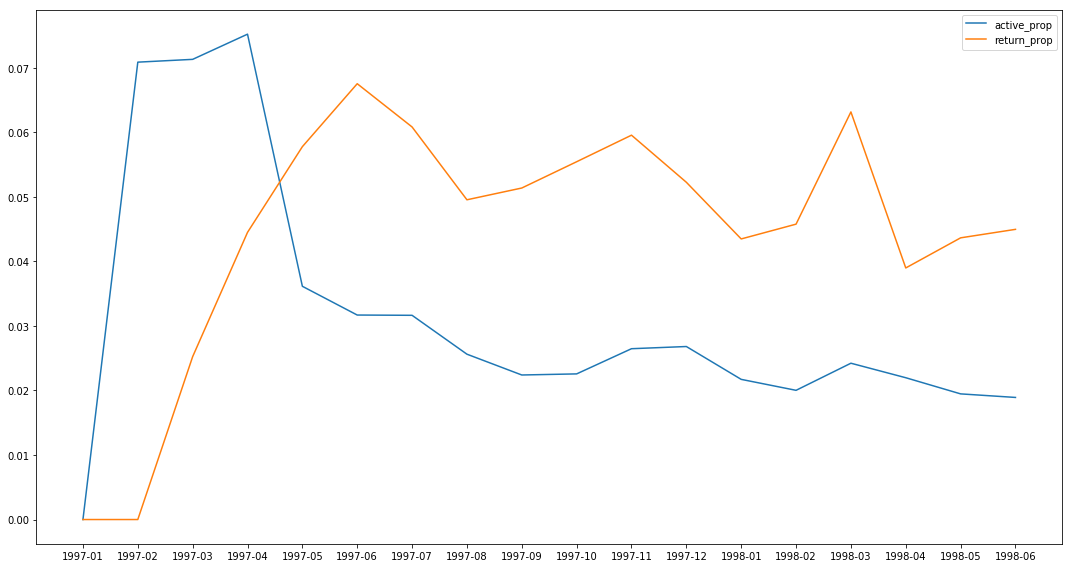

In [115]:

fig=plt.figure(figsize=(15,8))
plt.plot(pivoted_df3.month,pivoted_df3.active_prop)
plt.plot(pivoted_df3.month,pivoted_df3.return_prop)
plt.legend()
plt.tight_layout()
plt.show()